In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [5]:
for layer in vgg_base.layers:
    layer.trainable = False

In [7]:
model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [11]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


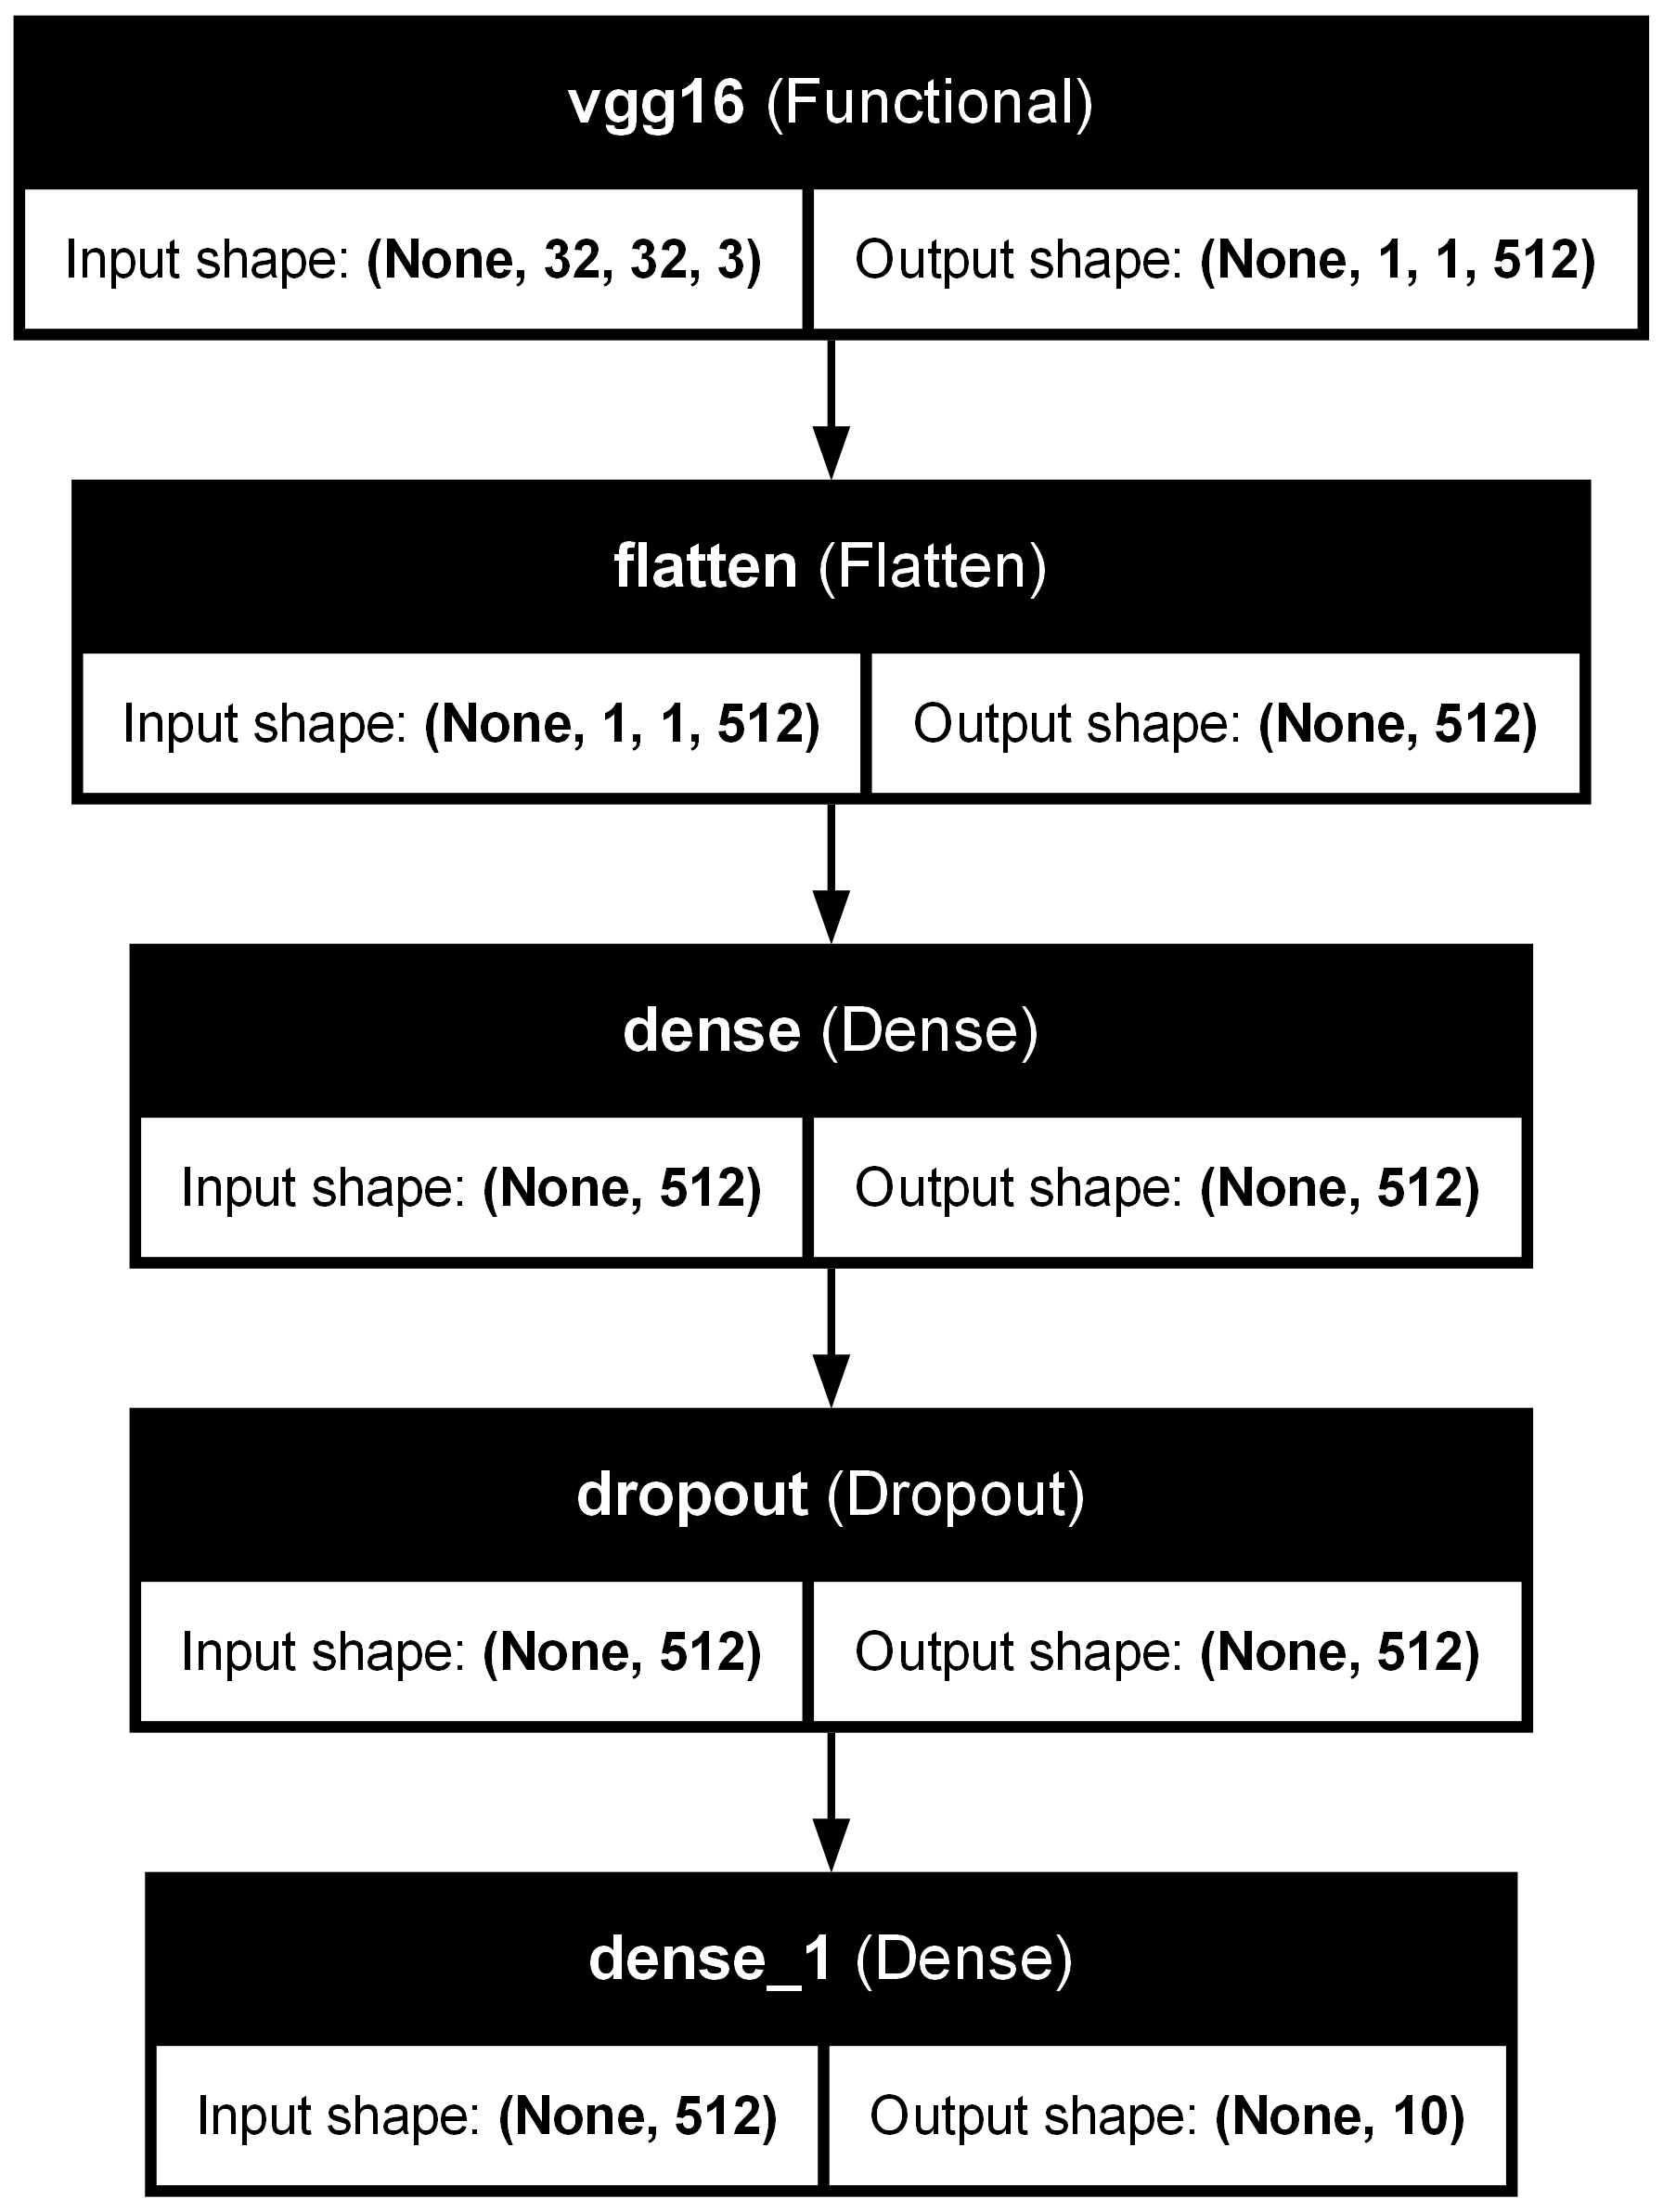

In [13]:
plot_model(model, to_file='cnn.png', show_shapes=True,
show_layer_names=True, dpi=300)

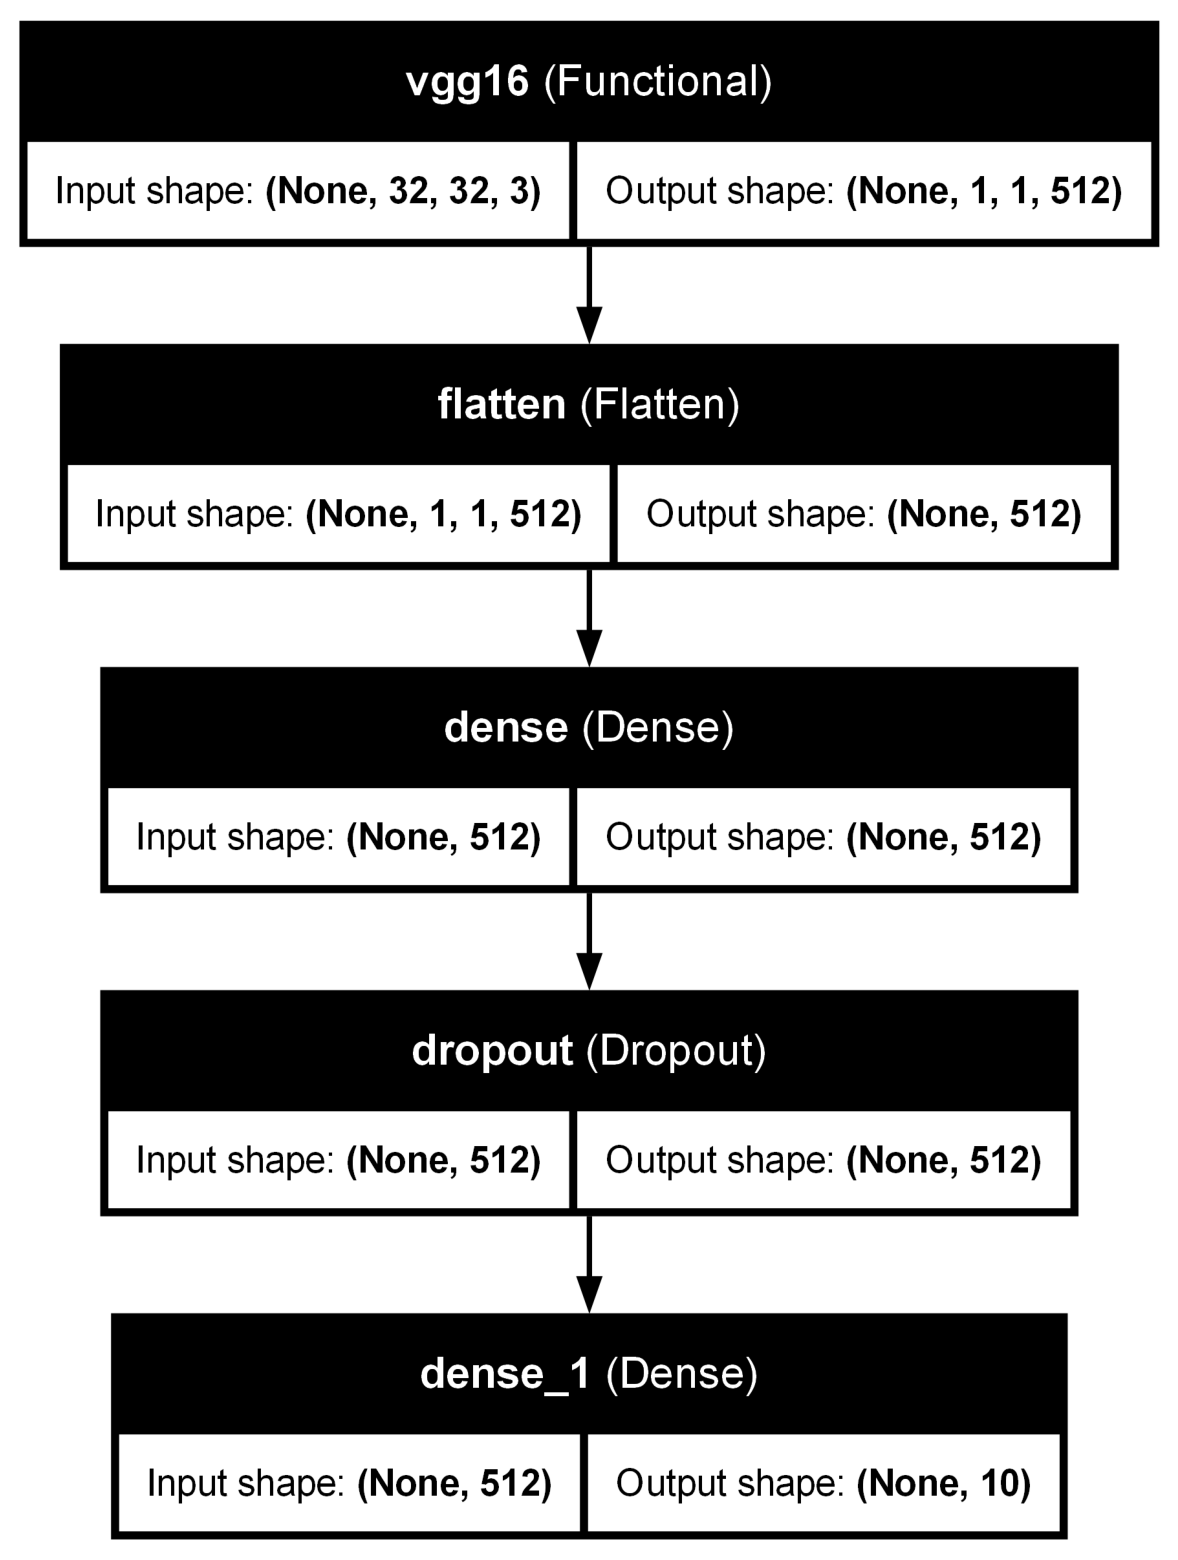

In [15]:
plt.figure(figsize=(20, 20))
img = plt.imread('cnn.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 270s 215ms/step - accuracy: 0.3743 - loss: 1.7770 - val_accuracy: 0.5056 - val_loss: 1.4646
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 279s 223ms/step - accuracy: 0.4918 - loss: 1.4684 - val_accuracy: 0.5362 - val_loss: 1.3563
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 290s 232ms/step - accuracy: 0.5210 - loss: 1.3745 - val_accuracy: 0.5447 - val_loss: 1.3050
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 222s 177ms/step - accuracy: 0.5440 - loss: 1.3165 - val_accuracy: 0.5611 - val_loss: 1.2608
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 227s 182ms/step - accuracy: 0.5559 - loss: 1.2766 - val_accuracy: 0.5732 - val_loss: 1.2352
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 177s 141ms/step - accuracy: 0.5669 - loss: 1.2510 - val_accuracy: 0.5786 - val_loss: 1.2154
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 172s 138ms/step - accuracy: 0.5736 - loss: 1.2247 - val_accuracy: 0.5808 - val_loss: 1.1988
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 174s 140ms/step - ac

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.5859 - loss: 1.1799
Test Loss: 1.1799
Test Accuracy: 58.59%


In [21]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

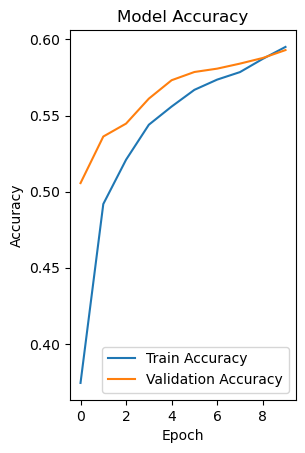

In [23]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')

plt.ylabel('Accuracy')
plt.legend()

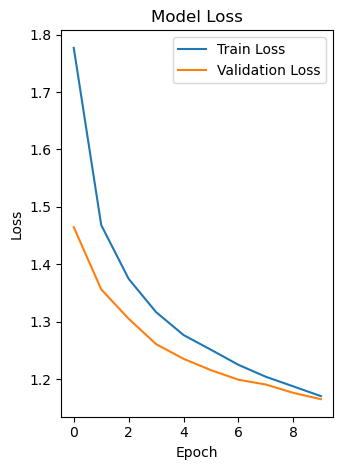

In [25]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

In [29]:
sample = x_test[0].reshape(1, 32, 32, 3)
prediction = model.predict(sample)
predicted_class = class_names[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


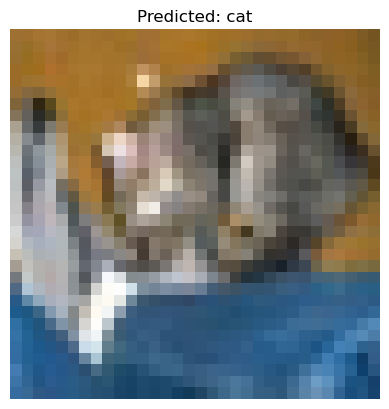

In [31]:
plt.imshow(x_test[0])
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()